# Project: Classify Song Genres from Audio Data Using Different Binary Classifiers

## Content


**1. Introduction** 

**2. Datasets** 

**3. Sourcing and Loading** 
- Import packages
- Load the data

**4. Inspect the data (Transform the data by merging dataframes)** 
 
**5. Visualization**
- Heatmap
- Histgrams 

**6. Normalizing the feature data**

**7. Principal Component Analysis on our scaled data**
- Scree Plot

**8. Further visualization of PCA**
- PCA Varience Explained Plot

**9. Models to classify genre**
- Decision Tree - Entropy - max_depth 3.
- Decision Tree - Gini - max_depth 3.
- Logistic Regression.
- Random Forests.
- Gradient-Boosting.
- XGBoost
- SVM: Support Vector Machines

(SMOTE: Synthetic Minority Over-Sampling Technique)

**10. Best Model and Conclusion**

## 1. Introduction

*These recommendations are so on point! How does this playlist know me so well?*

![Audi_song](https://user-images.githubusercontent.com/67468718/107107282-05f44b80-67e5-11eb-8b8a-669085d9361d.JPG)

Over the past few years, streaming services with huge catalogs have become the primary means through which most people listen to their favorite music. But at the same time, the sheer amount of music on offer can mean users might be a bit overwhelmed when trying to look for newer music that suits their tastes.

For this reason, streaming services have looked into means of categorizing music to allow for personalized recommendations. One method involves direct analysis of the raw audio information in a given song, scoring the raw data on a variety of metrics. Today, we'll be examining data compiled by a research group known as The Echo Nest. Our goal is to look through this dataset and classify songs as being either 'Hip-Hop' or 'Rock' - all without listening to a single one ourselves. In doing so, we will learn how to clean our data, do some exploratory data visualization, and use feature reduction towards the goal of feeding our data through some simple machine learning algorithms, such as decision trees and logistic regression.



## 2. Datasets

To begin with, let's load the metadata about our tracks alongside the track metrics compiled by The Echo Nest. A song is about more than its title, artist, and number of listens. We have another dataset that has musical features of each track such as <code>danceability</code> and <code>acousticness</code> on a scale from -1 to 1. These exist in two different files, which are in different formats - CSV and JSON. While CSV is a popular file format for denoting tabular data, JSON is another common file format in which databases often return the results of a given query.

Datasets are located in [tracks](https://www.kaggle.com/efstathiasdrolia/fmarockvshiphop) and [echonest_metrics](https://www.kaggle.com/veronikafilippou/echonestmetricsjson).

Let's start by creating two pandas <code>DataFrames</code> out of these files that we can merge so we have features and labels (often also referred to as <code>X</code> and <code>y</code>) for the classification later on.

## 3. Sourcing and Loading

### 3.1  Import Packages

In [3]:
# Import pandas
import pandas as pd

# Import numpy
import numpy as np

#Import matplotlib, seaborn and PCA:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Import train_test_split function and Decision tree classifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import KFold, cross_val_score

# This is just to make plots appear in the notebook
%matplotlib inline

In C:\Users\aktha\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\aktha\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\aktha\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\aktha\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\aktha\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

### 3.2 Load the Data

In [4]:
# Read in track metadata with genre labels
tracks = pd.read_csv('datasets/fma-rock-vs-hiphop.csv')

#check the top 5 rows of tracks:
tracks.head()

print('\n')

# Read in track metrics with the features
echonest_metrics = pd.read_json('datasets/echonest-metrics.json', precise_float=True)

#check the top 5 rows of echonest_metrics:
echonest_metrics.head()


,track_id,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,...,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
0,135,256000,1,NaN,2008-11-26 01:43:26,2008-11-26 00:00:00,837,0,Rock,"[45, 58]",...,NaN,2484,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1832,NaN,0,NaN,[],Father's Day
1,136,256000,1,NaN,2008-11-26 01:43:35,2008-11-26 00:00:00,509,0,Rock,"[45, 58]",...,NaN,1948,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1498,NaN,0,NaN,[],Peel Back The Mountain Sky
2,151,192000,0,NaN,2008-11-26 01:44:55,NaN,192,0,Rock,[25],...,NaN,701,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,148,NaN,4,NaN,[],Untitled 04
3,152,192000,0,NaN,2008-11-26 01:44:58,NaN,193,0,Rock,[25],...,NaN,637,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,98,NaN,11,NaN,[],Untitled 11
4,153,256000,0,Arc and Sender,2008-11-26 01:45:00,2008-11-26 00:00:00,405,5,Rock,[26],...,NaN,354,en,Attribution-NonCommercial-NoDerivatives (aka M...,424,NaN,2,NaN,[],Hundred-Year Flood


,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240
2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661
3,10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590
4,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072


## 4. Inspect the data 

In [5]:
tracks.info()
print('==============================================')
echonest_metrics.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17734 entries, 0 to 17733
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   track_id       17734 non-null  int64 
 1   bit_rate       17734 non-null  int64 
 2   comments       17734 non-null  int64 
 3   composer       166 non-null    object
 4   date_created   17734 non-null  object
 5   date_recorded  1898 non-null   object
 6   duration       17734 non-null  int64 
 7   favorites      17734 non-null  int64 
 8   genre_top      17734 non-null  object
 9   genres         17734 non-null  object
 10  genres_all     17734 non-null  object
 11  information    482 non-null    object
 12  interest       17734 non-null  int64 
 13  language_code  4089 non-null   object
 14  license        17714 non-null  object
 15  listens        17734 non-null  int64 
 16  lyricist       53 non-null     object
 17  number         17734 non-null  int64 
 18  publisher      52 non-null

### 4.1 Transforming our Datasets

In [6]:
#First let's have a general view of tracks df:
tracks_missing = pd.concat([tracks.nunique(), tracks.dtypes, tracks.isnull().sum(), 100*tracks.isnull().mean()], axis=1)
tracks_missing.columns = [['unique_count', 'data_type', 'missing_count', 'missing%']]
tracks_missing

,unique_count,data_type,missing_count,missing%
track_id,17734,int64,0,0.000000
bit_rate,1708,int64,0,0.000000
comments,9,int64,0,0.000000
composer,55,object,17568,99.063945
date_created,14158,object,0,0.000000
date_recorded,196,object,15836,89.297395
duration,883,int64,0,0.000000
favorites,66,int64,0,0.000000
genre_top,2,object,0,0.000000
genres,371,object,0,0.000000


In [7]:
#Second, let's have a general view of echonest_metrics df:
tracks_missing = pd.concat([echonest_metrics.nunique(), echonest_metrics.dtypes, echonest_metrics.isnull().sum(), 100*echonest_metrics.isnull().mean()], axis=1)
tracks_missing.columns = [['unique_count', 'data_type', 'missing_count', 'missing%']]
tracks_missing

,unique_count,data_type,missing_count,missing%
track_id,13129,int64,0,0.0
acousticness,12905,float64,0,0.0
danceability,13129,float64,0,0.0
energy,13129,float64,0,0.0
instrumentalness,12969,float64,0,0.0
liveness,13128,float64,0,0.0
speechiness,13129,float64,0,0.0
tempo,11902,float64,0,0.0
valence,13127,float64,0,0.0


In [8]:
# Unique columns of tracks:
tracks.columns.unique()

Index(['track_id', 'bit_rate', 'comments', 'composer', 'date_created',
       'date_recorded', 'duration', 'favorites', 'genre_top', 'genres',
       'genres_all', 'information', 'interest', 'language_code', 'license',
       'listens', 'lyricist', 'number', 'publisher', 'tags', 'title'],
      dtype='object')

In [9]:
# Unique columns of echonest_metrics:
echonest_metrics.columns.unique()

Index(['track_id', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence'],
      dtype='object')

Now from above, let's merge the 2 Dataframes: <code>tracks</code> &  <code>echonest_metrics</code>:

In [10]:
# Merge the relevant columns of tracks and echonest_metrics
df = echonest_metrics.merge(tracks[['track_id', 'genre_top']], on='track_id')

# Inspect the resultant dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4802 entries, 0 to 4801
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          4802 non-null   int64  
 1   acousticness      4802 non-null   float64
 2   danceability      4802 non-null   float64
 3   energy            4802 non-null   float64
 4   instrumentalness  4802 non-null   float64
 5   liveness          4802 non-null   float64
 6   speechiness       4802 non-null   float64
 7   tempo             4802 non-null   float64
 8   valence           4802 non-null   float64
 9   genre_top         4802 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 412.7+ KB


In [11]:
# Now let's review the new dataframe unique values, missing values and datatypes:
df_missing = pd.concat([df.nunique(), df.dtypes, df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
df_missing.columns = [['unique_count', 'data_type', 'missing_count', 'missing%']]
df_missing

,unique_count,data_type,missing_count,missing%
track_id,4802,int64,0,0.0
acousticness,4798,float64,0,0.0
danceability,4802,float64,0,0.0
energy,4802,float64,0,0.0
instrumentalness,4735,float64,0,0.0
liveness,4802,float64,0,0.0
speechiness,4802,float64,0,0.0
tempo,4693,float64,0,0.0
valence,4802,float64,0,0.0
genre_top,2,object,0,0.0


From above we can see that all our data is numerical except our dependent variable <code>genre_top</code>

<AxesSubplot:>

Text(0.5, 1.0, "'genre_top' dependent Variable Distribution")

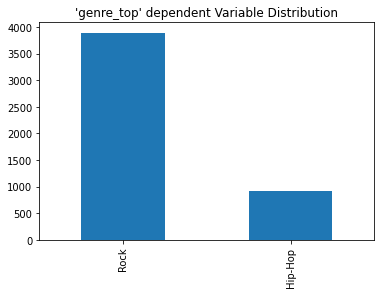

In [12]:
# let's see data distribution in our dependent variable "genre_top":
df.genre_top.value_counts().plot.bar()
plt.title("'genre_top' dependent Variable Distribution")


In [13]:
print('Proportion of the genre_top classe in the DataFrame:')
print(round(df['genre_top'].value_counts() / len(df) * 100, 4))

Proportion of the genre_top classe in the DataFrame:
Rock       81.0496
Hip-Hop    18.9504
Name: genre_top, dtype: float64


#### As shown above, the dependent variable is imbalanced!!

## 5. Visualization

<p>We typically want to avoid using variables that have strong correlations with each other -- hence avoiding feature redundancy -- for a few reasons:</p>
<ul>
<li>To keep the model simple and improve interpretability (with many features, we run the risk of overfitting).</li>
<li>When our datasets are very large, using fewer features can drastically speed up our computation time.</li>
</ul>
<p>To get a sense of whether there are any strongly correlated features in our data, we will plot the correlation using the heatmap from seaborn: 

<Figure size 1440x576 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Genre Correlations')

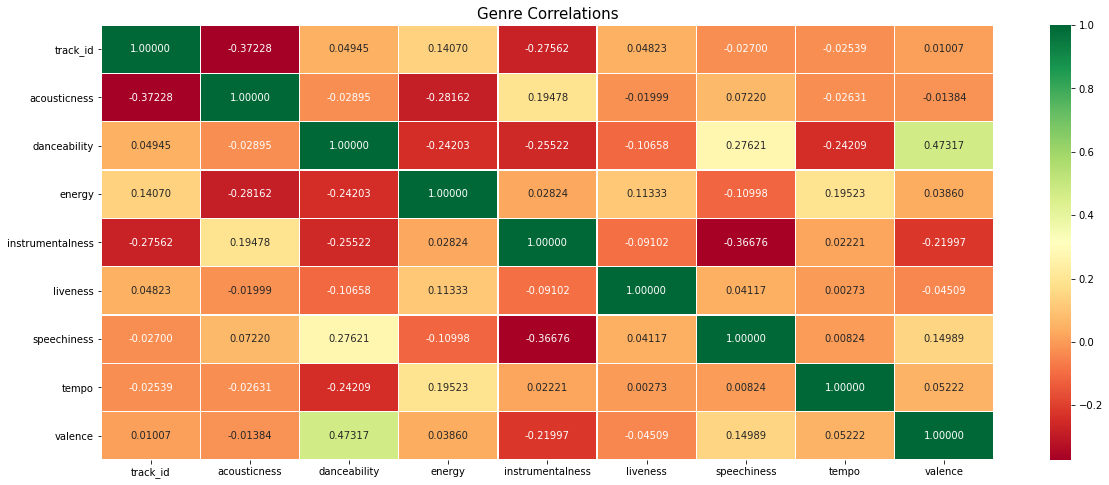

In [14]:
# Make a heatmap of the data 
plt.figure(figsize=(20,8)) # ensure that the Matplotlib plot is big enough
sns.heatmap(df.corr(), linewidths=.4, annot=True, fmt=".5f", cmap='RdYlGn')
plt.title('Genre Correlations', fontsize=15)

Text(0.5, 1.0, 'Danceability Distribution')

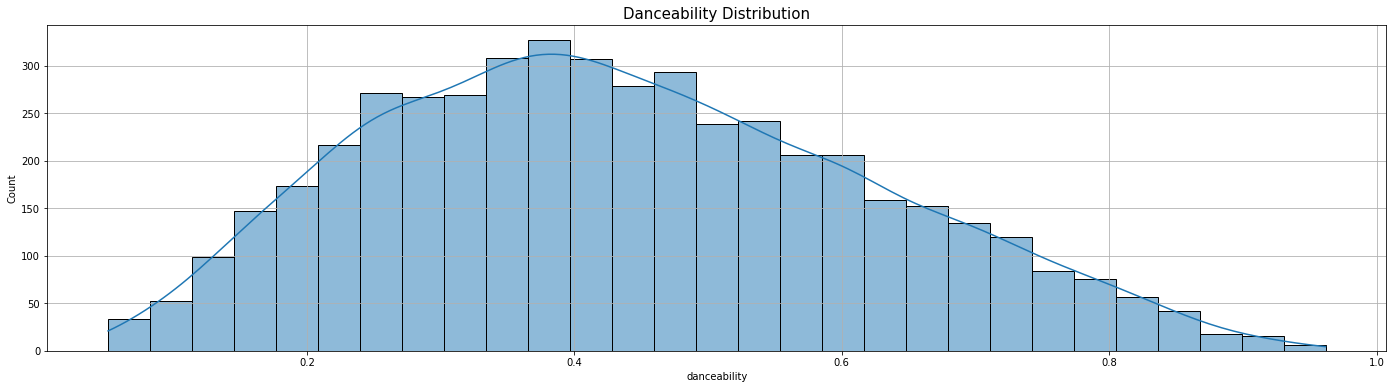

In [15]:
# Making a histogram of the danceability variable.
f, ax = plt.subplots(figsize = (24,6))
ax = sns.histplot(x=df['danceability'], kde=True)
ax.set_title('Danceability Distribution', fontsize=15)
plt.grid(True)

Text(0.5, 1.0, 'Valence Distribution')

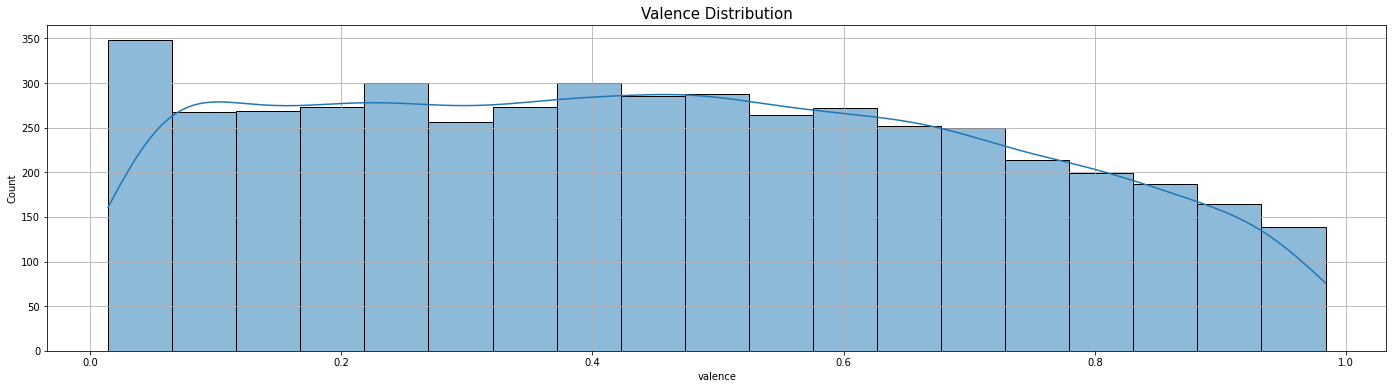

In [16]:
# Making a histogram of the valence variable.
f, ax = plt.subplots(figsize = (24,6))
ax = sns.histplot(x=df['valence'], kde=True)
ax.set_title('Valence Distribution', fontsize=15)
plt.grid(True)

## 6. Normalizing the feature data

<p>As mentioned earlier, it can be particularly useful to simplify our models and use as few features as necessary to achieve the best result. Since we didn't find any particular strong correlations between our features, we can instead use a common approach to reduce the number of features called <strong>principal component analysis (PCA)</strong>. </p>
<p>It is possible that the variance between genres can be explained by just a few features in the dataset. PCA rotates the data along the axis of highest variance, thus allowing us to determine the relative contribution of each feature of our data towards the variance between classes. </p>
<p>However, since PCA uses the absolute variance of a feature to rotate the data, a feature with a broader range of values will overpower and bias the algorithm relative to the other features. To avoid this, we must first normalize our data. There are a few methods to do this, but a common way is through <em>standardization</em>, such that all features have a mean = 0 and standard deviation = 1 (the resultant is a z-score).</p>

In [17]:
#let's view df unique columns: 
df.columns.unique()

Index(['track_id', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence',
       'genre_top'],
      dtype='object')

In [18]:
# Let's code the dependent variable genre_top as 'Rock' = 1 and 'Hip-Hop'= 0:
df['genre_top'] = df['genre_top'].replace('Rock', 1)
df['genre_top'] = df['genre_top'].replace('Hip-Hop', 0)

In [19]:
# let's define our features, target variable, X and y:
features = ['acousticness', 'danceability', 
            'energy','instrumentalness',
            'liveness', 'speechiness', 
            'tempo', 'valence',]


# Define our X, y
X = df[features]
y = df.genre_top

# Import the StandardScaler
from sklearn.preprocessing import StandardScaler

# Scale the features and set the values to a new variable
scaler = StandardScaler()
scaled_train_features = scaler.fit_transform(X)

## 7. Principal Component Analysis on our scaled data

<p>Now that we have preprocessed our data, we are ready to use PCA to determine by how much we can reduce the dimensionality of our data. We can use <strong>scree-plots</strong> and <strong>cumulative explained ratio plots</strong> to find the number of components to use in further analyses.</p>
<p>Scree-plots display the number of components against the variance explained by each component, sorted in descending order of variance. Scree-plots help us get a better sense of which components explain a sufficient amount of variance in our data. When using scree plots, an 'elbow' (a steep drop from one data point to the next) in the plot is typically used to decide on an appropriate cutoff.</p>

PCA()

Text(0.5, 0, 'Number of Principal Components')

Text(0, 0.5, 'Eigenvalue')

Text(0.5, 1.0, 'Scree Plot')

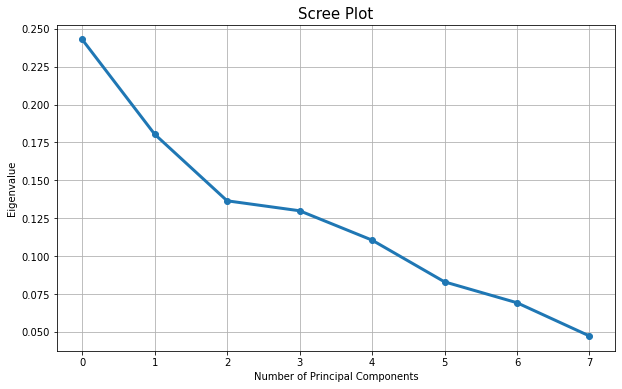

In [20]:
# This is just to make plots appear in the notebook
%matplotlib inline

# Get our explained variance ratios from PCA using all features
pca = PCA()
pca.fit(scaled_train_features)
exp_variance = pca.explained_variance_ratio_

# plot the explained variance using a barplot
fig, ax = plt.subplots(figsize = (10,6))
ax.plot(range(pca.n_components_), exp_variance, marker='o', linewidth=3)
ax.set_xlabel('Number of Principal Components')
ax.set_ylabel('Eigenvalue')
ax.set_title('Scree Plot', fontsize=15)
plt.grid(True)

## 8. Further visualization of PCA

<p>Unfortunately, there does not appear to be a clear elbow in this scree plot, which means it is not straightforward to find the number of intrinsic dimensions using this method. </p>
<p>But all is not lost! Instead, we can also look at the <strong>cumulative explained variance plot</strong> to determine how many features are required to explain, say, about 85% of the variance (cutoffs are somewhat arbitrary here, and usually decided upon by 'rules of thumb'). Once we determine the appropriate number of components, we can perform PCA with that many components, ideally reducing the dimensionality of our data.</p>

Text(0.5, 0, 'Number of Principal Components')

Text(0, 0.5, 'cumulative explained variance')

Text(0.5, 1.0, 'PCA Varience Explained')

PCA(n_components=6, random_state=10)

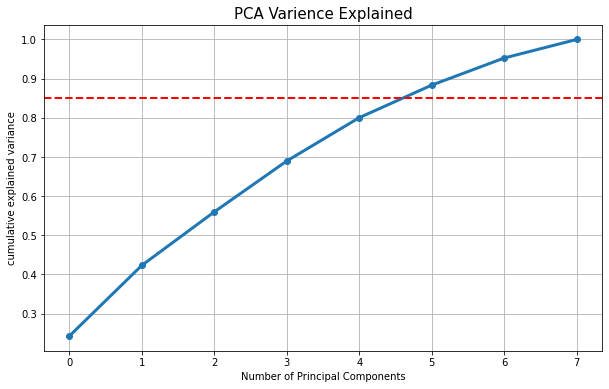

In [21]:
# Calculate the cumulative explained variance
cum_exp_variance = np.cumsum(exp_variance)

# Plot the cumulative explained variance and draw a dashed line at 0.85.
fig, ax = plt.subplots(figsize = (10,6))
ax.plot(cum_exp_variance, linewidth=3, marker='o')
ax.axhline(y=0.85, linestyle='--', linewidth=2, color='r')
plt.grid(True)
ax.set_xlabel('Number of Principal Components')
ax.set_ylabel('cumulative explained variance')
ax.set_title('PCA Varience Explained', fontsize=15)

# choose the n_components where about 85% of our variance can be explained
n_components = 6

# Perform PCA with the chosen number of components and project data onto components
pca = PCA(n_components, random_state=10)
pca.fit(scaled_train_features)
pca_projection = pca.transform(scaled_train_features)

## 9. Models to classify genre

Now we can use the lower dimensional PCA projection of the data to classify songs into genres. To do that, we first need to split our dataset into 'train' and 'test' subsets, where the 'train' subset will be used to train our model while the 'test' dataset allows for model performance validation.

Here, we will be using a simple algorithm known as a decision tree. Decision trees are rule-based classifiers that take in features and follow a 'tree structure' of binary decisions to ultimately classify a data point into one of two or more categories. In addition to being easy to both use and interpret, decision trees allow us to visualize the 'logic flowchart' that the model generates from the training data.

Here is an example of a decision tree that demonstrates the process by which an input image (in this case, of a shape) might be classified based on the number of sides it has and whether it is rotated.

<p align="center">
  <img width="450" height="650" src="https://user-images.githubusercontent.com/67468718/107117039-3e6b4800-682c-11eb-8884-79bcd4b979eb.JPG">
</p>


#### <ins>Models will be used to classify Genres:<ins>

  * **Decision Tree - Entropy - max_depth 3.**
  * **Decision Tree - Gini - max_depth 3.**
  * **Logistic Regression.**
  * **Random Forests.**
  * **Gradient-Boosting.**
  * **XGBoost**
  * **SVM: Support Vector Machines**
  
  
  

In [22]:
# Split our data
X_train, X_test, y_train, y_test = train_test_split(pca_projection,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=2018)

## 9.1 SMOTE:

SMOTE stands for **Synthetic Minority Over-Sampling Technique**. Just like the name suggests, SMOTE generates a synthetic data for the minority class and then proceeds by joining the points of the minority class with line segments and then places artificial points on these lines:

![SMOTE](https://user-images.githubusercontent.com/67468718/107210218-b0709800-69b8-11eb-97d0-e4a857c6250b.JPG)

The heart of SMOTE is the construction of the **minority classes**. The intuition behind the construction algorithm is simple. You have already studied that oversampling causes overfitting, and because of repeated instances, the decision boundary gets tightened. What if you could generate similar samples instead of repeating them? In the original SMOTE paper (linked above) it has been shown that to a machine learning algorithm, these newly constructed instances are not exact copies, and thus it softens the decision boundary and thereby helping the algorithm to approximate the hypothesis more accurately.

#### Under the hood, the SMOTE algorithm works in below simple steps:
  * Choose a minority class input vector.
  * Find its k nearest neighbors (k_neighbors is specified as an argument in the SMOTE() function).
  * Choose one of these neighbors and place a synthetic point anywhere on the line joining the point under consideration and its chosen neighbor.
  * Repeat the steps until data is balance.
  * SMOTE is implemented in Python using the imblearn library.


In [23]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2018)

In [24]:
X_train_new, y_train_new = sm.fit_sample(X_train, y_train.ravel())

<AxesSubplot:>

Text(0.5, 1.0, 'Dependent Variable - Imbalanced (Before SMOTE)')

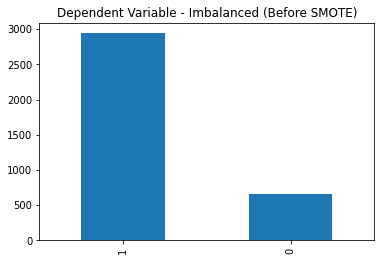

In [25]:
# observe that data has been imbalanced: (Before SMOTE)
pd.Series(y_train).value_counts().plot.bar()
plt.title('Dependent Variable - Imbalanced (Before SMOTE)')


<AxesSubplot:>

Text(0.5, 1.0, 'Dependent Variable - Balanced (After SMOTE)')

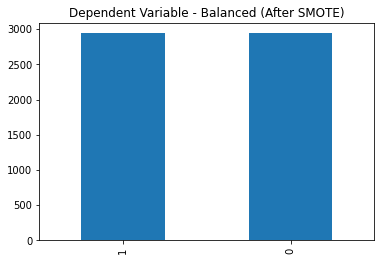

In [26]:
# observe that data has been balanced: (After SMOTE)
pd.Series(y_train_new).value_counts().plot.bar()
plt.title('Dependent Variable - Balanced (After SMOTE)')

## 9.2 Decision Tree - Entropy - max_depth=3

### 9.2.1 Fitting a Decision Tree Entropy - max_depth=3 model to the train set

In [27]:
# Declare a variable called entr_model_3_i, and assign it: DecisionTreeClassifier:
entr_model_3_i = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state = 2018)

# Call fit() on entr_model:
entr_model_3_i.fit(X_train, y_train)

# Call predict() on entr_model with X_test passed to it, and assign the result to a variable y_pred 
y_pred_3_i = entr_model_3_i.predict(X_test)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=2018)

In [28]:
# Declare a variable called entr_model_3_i, and assign it: DecisionTreeClassifier:
entr_model_3_b = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state = 2018)

# Call fit() on entr_model:
entr_model_3_b.fit(X_train_new, y_train_new)

# Call predict() on entr_model with X_test passed to it, and assign the result to a variable y_pred 
y_pred_3_b = entr_model_3_b.predict(X_test)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=2018)

### 9.2.2 Decision Tree Entropy - max_depth=3  model: Evaluating Performance

In [32]:
from sklearn.metrics import precision_recall_curve, f1_score, auc
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,log_loss

from sklearn import tree, metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Run this block for model evaluation metrics 
print("Model Entropy - max_depth=3 - Imbalanced")
print("Accuracy: {:0.5f}".format(metrics.accuracy_score(y_test,y_pred_3_i) *100), "%")
print('\n')
print("Model Entropy - max_depth=3 - Imbalanced: classification report")
print(classification_report(y_test, y_pred_3_i, digits=6))

Model Entropy - max_depth=3 - Imbalanced
Accuracy: 86.42798 %


Model Entropy - max_depth=3 - Imbalanced: classification report
              precision    recall  f1-score   support

           0   0.789474  0.478088  0.595533       251
           1   0.875119  0.966316  0.918459       950

    accuracy                       0.864280      1201
   macro avg   0.832296  0.722202  0.756996      1201
weighted avg   0.857220  0.864280  0.850970      1201



In [33]:
# Run this block for model evaluation metrics 
print("Model Entropy - max_depth=3 - Balanced")
print("Accuracy: {:0.5f}".format(metrics.accuracy_score(y_test,y_pred_3_b) *100), "%")
print('\n')
print("Model Entropy - max_depth=3 - Balanced: classification report")
print(classification_report(y_test, y_pred_3_b, digits=6))

Model Entropy - max_depth=3 - Balanced
Accuracy: 85.92839 %


Model Entropy - max_depth=3 - Balanced: classification report
              precision    recall  f1-score   support

           0   0.648551  0.713147  0.679317       251
           1   0.922162  0.897895  0.909867       950

    accuracy                       0.859284      1201
   macro avg   0.785356  0.805521  0.794592      1201
weighted avg   0.864979  0.859284  0.861683      1201



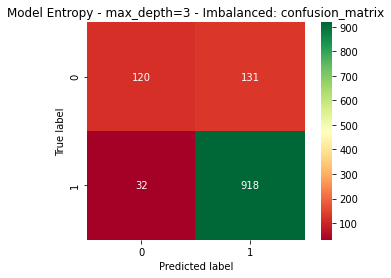

In [34]:
mat = confusion_matrix(y_test, y_pred_3_i)
sns.heatmap(mat, square=True, annot=True, fmt='d', cmap='RdYlGn')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Model Entropy - max_depth=3 - Imbalanced: confusion_matrix');

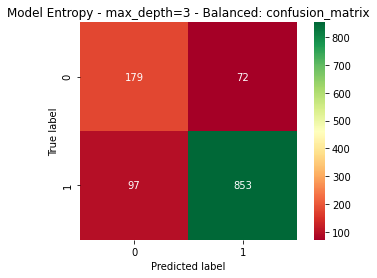

In [35]:
mat = confusion_matrix(y_test, y_pred_3_b)
sns.heatmap(mat, square=True, annot=True, fmt='d', cmap='RdYlGn')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Model Entropy - max_depth=3 - Balanced: confusion_matrix');

In [36]:
print('Model Entropy - max_depth=3 - Imabalanced: confusion_matrix')
print(pd.crosstab(y_test.ravel(), y_pred_3_i.ravel(), rownames = ['True'], colnames = ['Predicted'], margins = True))

Model Entropy - max_depth=3 - Imabalanced: confusion_matrix
Predicted    0     1   All
True                      
0          120   131   251
1           32   918   950
All        152  1049  1201


In [37]:
print("Before over sampling")
print("As shown from the confusion Matrix: 131 out of 251 instances which belong to Class 0 have been classified as class 1, so basically we're missing about:")
print(round((131/251 * 100), 3), "%")

Before over sampling
As shown from the confusion Matrix: 131 out of 251 instances which belong to Class 0 have been classified as class 1, so basically we're missing about:
52.191 %


In [38]:
print('Model Entropy - max_depth=3 - Balanced: confusion_matrix')
print(pd.crosstab(y_test.ravel(), y_pred_3_b.ravel(), rownames = ['True'], colnames = ['Predicted'], margins = True))

Model Entropy - max_depth=3 - Balanced: confusion_matrix
Predicted    0    1   All
True                     
0          179   72   251
1           97  853   950
All        276  925  1201


In [39]:
print("After over sampling")
print("As shown from the confusion Matrix: 72 out of 251 instances which belong to Class 0 have been classified as class 1, so basically we're missing about:")
print(round((72/251 * 100), 3), "%")

After over sampling
As shown from the confusion Matrix: 72 out of 251 instances which belong to Class 0 have been classified as class 1, so basically we're missing about:
28.685 %


As shown above, even though the acuracy went down from 86.4% to 85.9% our Model started classifing Minority class much better and has improved by 23.5% (Missing prediction in Minority class was 52.2% and after oversampling 28.7%)

### 9.2.3 Decision Tree Entropy - max_depth=3 model: ROC AUC

Model Entropy - Max_depth=3 - Imabalanced - AUC: 88.23401 %


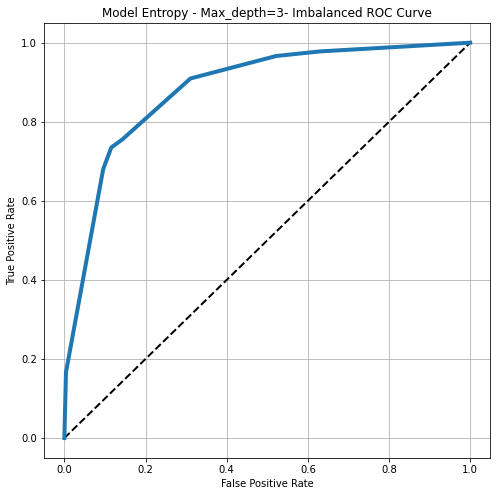

In [40]:
# Compute predicted probabilities: y_pred_prob:
y_pred_prob_3_i = entr_model_3_i.predict_proba(X_test)[:,1]

print("Model Entropy - Max_depth=3 - Imabalanced - AUC: {:0.5f}".format(roc_auc_score(y_test, y_pred_prob_3_i) * 100), "%")

# Generate ROC curve values: fpr, tpr, thresholds:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_3_i)
# Plot ROC curve:
plt.subplots(figsize = (8,8))
plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.plot(fpr, tpr, label='Model Entropy - max_depth=3', linewidth=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Model Entropy - Max_depth=3- Imbalanced ROC Curve')
plt.grid(True)
plt.show();

Model Entropy -  Max_depth=3  - Balanced - AUC: 87.33634 %


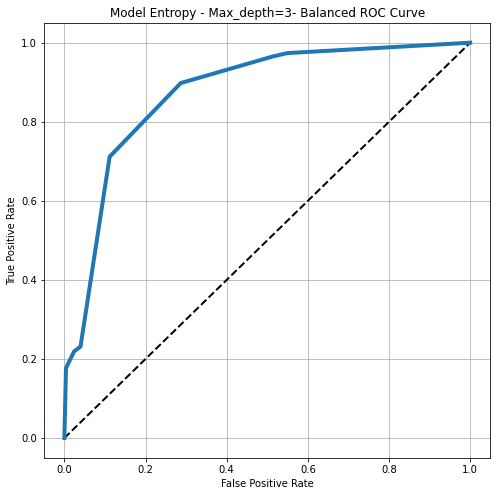

In [41]:
# Compute predicted probabilities: y_pred_prob:
y_pred_prob_3_b = entr_model_3_b.predict_proba(X_test)[:,1]

print("Model Entropy -  Max_depth=3  - Balanced - AUC: {:0.5f}".format(roc_auc_score(y_test, y_pred_prob_3_b) * 100), "%")

# Generate ROC curve values: fpr, tpr, thresholds:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_3_b)
# Plot ROC curve:
plt.subplots(figsize = (8,8))
plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.plot(fpr, tpr, label='Model Entropy - max_depth=3', linewidth=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Model Entropy - Max_depth=3- Balanced ROC Curve')
plt.grid(True)
plt.show();

## 9.3 Decision Tree - Gini - Max-depth=3 Model

### 9.3.1 Fitting a Decision Tree Gini - Max-depth=3 model to the train set


In [42]:
# Declare a variable called gini_model_3_i, and assign it: DecisionTreeClassifier:
gini_model_3_i = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state = 2018)

# Call fit() on entr_model:
gini_model_3_i.fit(X_train, y_train)

# Call predict() on entr_model with X_test passed to it, and assign the result to a variable y_pred 
y_pred_3_i = gini_model_3_i.predict(X_test)


DecisionTreeClassifier(max_depth=3, random_state=2018)

In [43]:
# Declare a variable called gini_model_3_i, and assign it: DecisionTreeClassifier:
gini_model_3_b = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state = 2018)

# Call fit() on entr_model:
gini_model_3_b.fit(X_train_new, y_train_new)

# Call predict() on entr_model with X_test passed to it, and assign the result to a variable y_pred 
y_pred_3_b = gini_model_3_b.predict(X_test)


DecisionTreeClassifier(max_depth=3, random_state=2018)

### 9.3.2 Decision Tree Gini - max_depth=3 model: Evaluating Performance

In [44]:
# Run this block for model evaluation metrics 
print("Model Gini - max_depth=3 - Imbalanced")
print("Accuracy: {:0.5f}".format(metrics.accuracy_score(y_test,y_pred_3_i) *100), "%")
print('\n')
print("Model Gini - max_depth=3 - Imbalanced: classification report")
print(classification_report(y_test, y_pred_3_i, digits=6))

Model Gini - max_depth=3 - Imbalanced
Accuracy: 86.76103 %


Model Gini - max_depth=3 - Imbalanced: classification report
              precision    recall  f1-score   support

           0   0.794872  0.494024  0.609337       251
           1   0.878469  0.966316  0.920301       950

    accuracy                       0.867610      1201
   macro avg   0.836670  0.730170  0.764819      1201
weighted avg   0.860998  0.867610  0.855312      1201



In [45]:
# Run this block for model evaluation metrics 
print("Model Gini - max_depth=3 - Balanced")
print("Accuracy: {:0.5f}".format(metrics.accuracy_score(y_test,y_pred_3_b) *100), "%")
print('\n')
print("Model Gini - max_depth=3 - Balanced: classification report")
print(classification_report(y_test, y_pred_3_b, digits=6))

Model Gini - max_depth=3 - Balanced
Accuracy: 85.92839 %


Model Gini - max_depth=3 - Balanced: classification report
              precision    recall  f1-score   support

           0   0.648551  0.713147  0.679317       251
           1   0.922162  0.897895  0.909867       950

    accuracy                       0.859284      1201
   macro avg   0.785356  0.805521  0.794592      1201
weighted avg   0.864979  0.859284  0.861683      1201



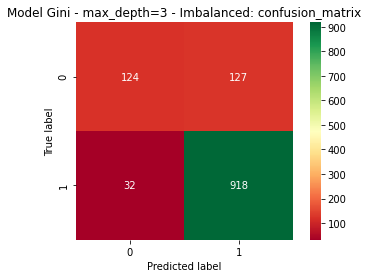

In [46]:
mat = confusion_matrix(y_test, y_pred_3_i)
sns.heatmap(mat, square=True, annot=True, fmt='d', cmap='RdYlGn')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Model Gini - max_depth=3 - Imbalanced: confusion_matrix');


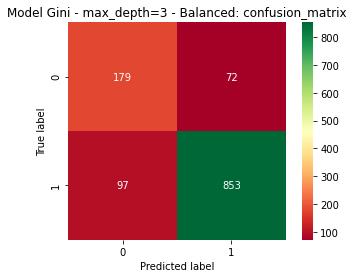

In [47]:
mat = confusion_matrix(y_test, y_pred_3_b)
sns.heatmap(mat, square=True, annot=True, fmt='d', cmap='RdYlGn')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Model Gini - max_depth=3 - Balanced: confusion_matrix');

In [48]:
print('Model Gini - max_depth=3 - Imabalanced: confusion_matrix')
print(pd.crosstab(y_test.ravel(), y_pred_3_i.ravel(), rownames = ['True'], colnames = ['Predicted'], margins = True))

Model Gini - max_depth=3 - Imabalanced: confusion_matrix
Predicted    0     1   All
True                      
0          124   127   251
1           32   918   950
All        156  1045  1201


In [49]:
print("Before over sampling")
print("As shown from the confusion Matrix: 127 out of 251 instances which belong to Class 0 have been classified as class 1, so basically we're missing about:")
print(round((127/251 * 100), 3), "%")

Before over sampling
As shown from the confusion Matrix: 127 out of 251 instances which belong to Class 0 have been classified as class 1, so basically we're missing about:
50.598 %


In [50]:
print('Model Gini - max_depth=3 - Balanced: confusion_matrix')
print(pd.crosstab(y_test.ravel(), y_pred_3_b.ravel(), rownames = ['True'], colnames = ['Predicted'], margins = True))

Model Gini - max_depth=3 - Balanced: confusion_matrix
Predicted    0    1   All
True                     
0          179   72   251
1           97  853   950
All        276  925  1201


In [51]:
print("After over sampling")
print("As shown from the confusion Matrix: 72 out of 251 instances which belong to Class 0 have been classified as class 1, so basically we're missing about:")
print(round((72/251 * 100), 3), "%")

After over sampling
As shown from the confusion Matrix: 72 out of 251 instances which belong to Class 0 have been classified as class 1, so basically we're missing about:
28.685 %


As shown above, even though the acuracy went down from 86.8% to 85.9% our Model started classifing Minority class much better and has improved by 22% (Missing prediction in Minority class was 50.6% and after oversampling 28.7%)

### 9.3.3 Decision Tree Gini - max_depth=3 model: ROC AUC

Model Gini - max_depth=3 - Imbalanced - AUC: 87.73055 %


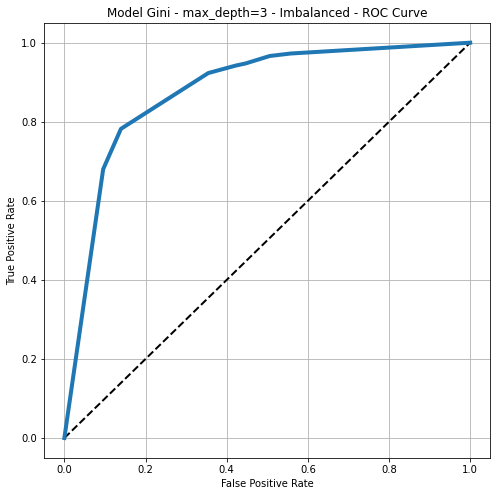

In [115]:
# Compute predicted probabilities: y_pred_prob:
y_pred_prob_3_i = gini_model_3_i.predict_proba(X_test)[:,1]

print("Model Gini - max_depth=3 - Imbalanced - AUC: {:0.5f}".format(roc_auc_score(y_test, y_pred_prob_3_i) * 100), "%")

# Generate ROC curve values: fpr, tpr, thresholds:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_3_i)
# Plot ROC curve:
plt.subplots(figsize = (8,8))
plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.plot(fpr, tpr, label='Model Gini - max_depth=3 - Imbalanced', linewidth=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Model Gini - max_depth=3 - Imbalanced - ROC Curve')
plt.grid(True)
plt.show();

Model Gini - max_depth=3 - Balanced - AUC: 88.10401 %


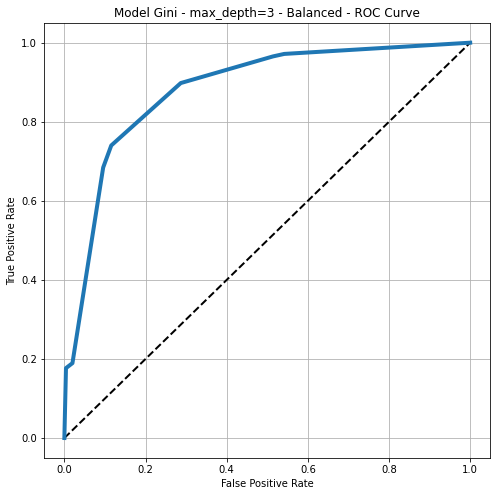

In [116]:
# Compute predicted probabilities: y_pred_prob:
y_pred_prob_3_b = gini_model_3_b.predict_proba(X_test)[:,1]

print("Model Gini - max_depth=3 - Balanced - AUC: {:0.5f}".format(roc_auc_score(y_test, y_pred_prob_3_b) * 100), "%")

# Generate ROC curve values: fpr, tpr, thresholds:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_3_b)
# Plot ROC curve:
plt.subplots(figsize = (8,8))
plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.plot(fpr, tpr, label='Model Gini - max_depth=3 - Balanced', linewidth=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Model Gini - max_depth=3 - Balanced - ROC Curve')
plt.grid(True)
plt.show();

## 9.4 Logistic Regression Model

### 9.4.1 Fitting a Logistic Regression Model to the train set

In [54]:
# Declare a variable called logreg_i, and assign it: LogisticRegression:
logreg_i = LogisticRegression()

# Call fit() on logreg_i:
logreg_i.fit(X_train, y_train)

# Call predict() on entr_model with X_test passed to it, and assign the result to a variable y_pred 
y_pred_i = logreg_i.predict(X_test)

LogisticRegression()

In [55]:
# Declare a variable called logreg_i, and assign it: LogisticRegression:
logreg_b = LogisticRegression()

# Call fit() on logreg_i:
logreg_b.fit(X_train_new, y_train_new)

# Call predict() on entr_model with X_test passed to it, and assign the result to a variable y_pred_b 
y_pred_b = logreg_b.predict(X_test)

LogisticRegression()

### 9.4.2 Logistic Regression Model: Evaluating Performance

In [56]:
# Run this block for model evaluation metrics 
print("Logistic Regression Model - Imbalanced")
print("Accuracy: {:0.5f}".format(metrics.accuracy_score(y_test,y_pred_i) *100), "%")
print('\n')
print("Logistic Regression Model - Imbalanced: classification report")
print(classification_report(y_test, y_pred_i, digits=6))

Logistic Regression Model - Imbalanced
Accuracy: 86.76103 %


Logistic Regression Model - Imbalanced: classification report
              precision    recall  f1-score   support

           0   0.798701  0.490040  0.607407       251
           1   0.877746  0.967368  0.920381       950

    accuracy                       0.867610      1201
   macro avg   0.838224  0.728704  0.763894      1201
weighted avg   0.861226  0.867610  0.854972      1201



In [57]:
# Run this block for model evaluation metrics 
print("Logistic Regression Model - Balanced")
print("Accuracy: {:0.5f}".format(metrics.accuracy_score(y_test,y_pred_b) *100), "%")
print('\n')
print("Logistic Regression Model - Balanced: classification report")
print(classification_report(y_test, y_pred_b, digits=6))

Logistic Regression Model - Balanced
Accuracy: 84.26311 %


Logistic Regression Model - Balanced: classification report
              precision    recall  f1-score   support

           0   0.592262  0.792829  0.678024       251
           1   0.939884  0.855789  0.895868       950

    accuracy                       0.842631      1201
   macro avg   0.766073  0.824309  0.786946      1201
weighted avg   0.867234  0.842631  0.850340      1201



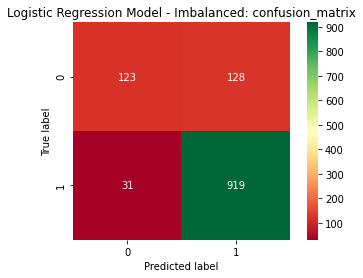

In [58]:
mat = confusion_matrix(y_test, y_pred_i)
sns.heatmap(mat, square=True, annot=True, fmt='d', cmap='RdYlGn')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Logistic Regression Model - Imbalanced: confusion_matrix');

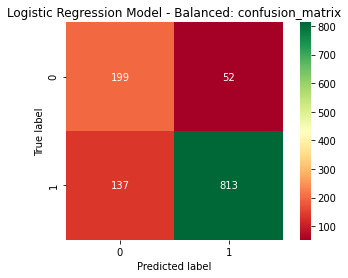

In [59]:
mat = confusion_matrix(y_test, y_pred_b)
sns.heatmap(mat, square=True, annot=True, fmt='d', cmap='RdYlGn')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Logistic Regression Model - Balanced: confusion_matrix');

In [60]:
print('Logistic Regression Model - Imabalanced: confusion_matrix')
print(pd.crosstab(y_test.ravel(), y_pred_i.ravel(), rownames = ['True'], colnames = ['Predicted'], margins = True))

Logistic Regression Model - Imabalanced: confusion_matrix
Predicted    0     1   All
True                      
0          123   128   251
1           31   919   950
All        154  1047  1201


In [61]:
print("Before over sampling")
print("As shown from the confusion Matrix: 128 out of 251 instances which belong to Class 0 have been classified as class 1, so basically we're missing about:")
print(round((128/251 * 100), 3), "%")

Before over sampling
As shown from the confusion Matrix: 128 out of 251 instances which belong to Class 0 have been classified as class 1, so basically we're missing about:
50.996 %


In [62]:
print('Logistic Regression Model - Balanced: confusion_matrix')
print(pd.crosstab(y_test.ravel(), y_pred_b.ravel(), rownames = ['True'], colnames = ['Predicted'], margins = True))

Logistic Regression Model - Balanced: confusion_matrix
Predicted    0    1   All
True                     
0          199   52   251
1          137  813   950
All        336  865  1201


In [63]:
print("After over sampling")
print("As shown from the confusion Matrix: 52 out of 251 instances which belong to Class 0 have been classified as class 1, so basically we're missing about:")
print(round((52/251 * 100), 3), "%")

After over sampling
As shown from the confusion Matrix: 52 out of 251 instances which belong to Class 0 have been classified as class 1, so basically we're missing about:
20.717 %


As shown above, even though the acuracy went down from 86.7% to 84.3% our Model started classifing Minority class much better and has improved by 30.3% (Missing prediction in Minority class was 51% and after oversampling 20.7%)

### 9.4.3 Logisitic Regression model: ROC AUC

Logistic Regression model - Imabalnced - AUC: 90.06291 %


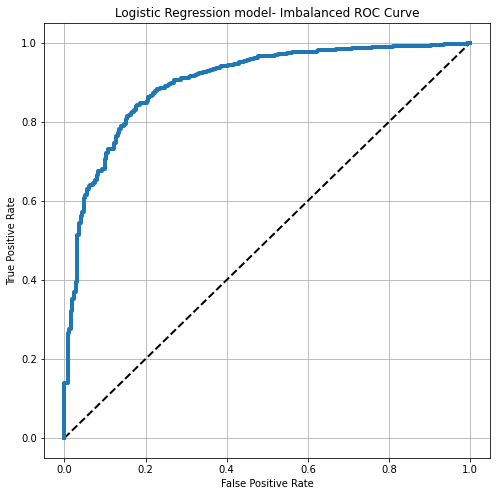

In [117]:
# Compute predicted probabilities: y_pred_prob:
y_pred_prob_i = logreg_i.predict_proba(X_test)[:,1]

print("Logistic Regression model - Imabalnced - AUC: {:0.5f}".format(roc_auc_score(y_test, y_pred_prob_i) * 100), "%")

# Generate ROC curve values: fpr, tpr, thresholds:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_i)
# Plot ROC curve:
plt.subplots(figsize = (8,8))
plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.plot(fpr, tpr, label='Logistic Regression model', linewidth=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression model- Imbalanced ROC Curve')
plt.grid(True)
plt.show();

Logistic Regression model - Balanced - AUC: 90.01887 %


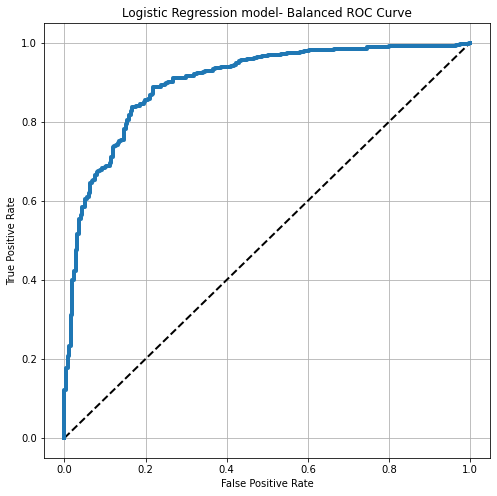

In [118]:
# Compute predicted probabilities: y_pred_prob:
y_pred_prob_b = logreg_b.predict_proba(X_test)[:,1]

print("Logistic Regression model - Balanced - AUC: {:0.5f}".format(roc_auc_score(y_test, y_pred_prob_b) * 100), "%")

# Generate ROC curve values: fpr, tpr, thresholds:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_b)
# Plot ROC curve:
plt.subplots(figsize = (8,8))
plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.plot(fpr, tpr, label='Logistic Regression model', linewidth=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression model- Balanced ROC Curve')
plt.grid(True)
plt.show();

## 9.5 Random Forests Model

### 9.5.1 Fitting a Random Forests Model to the train set



In [66]:
from sklearn.ensemble import RandomForestClassifier

# Declare a variable called rf_i, and assign it: RandomForestClassifier:
rf_i = RandomForestClassifier(max_depth=3, random_state = 2018)

# Call fit() on rf_i:
rf_i.fit(X_train, y_train)

# Call predict() on entr_model with X_test passed to it, and assign the result to a variable y_pred_i 
y_pred_i = rf_i.predict(X_test)

RandomForestClassifier(max_depth=3, random_state=2018)

In [67]:
# Declare a variable called rf_b, and assign it: RandomForestClassifier:
rf_b = RandomForestClassifier(max_depth=3, random_state = 2018)

# Call fit() on rf_b:
rf_b.fit(X_train_new, y_train_new)

# Call predict() on entr_model with X_test passed to it, and assign the result to a variable y_pred_b 
y_pred_b = rf_b.predict(X_test)

RandomForestClassifier(max_depth=3, random_state=2018)

### 9.5.2 Random Forests Model: Evaluating Performance

In [68]:
# Run this block for model evaluation metrics 
print("Random Forests Model - Imbalanced")
print("Accuracy: {:0.5f}".format(metrics.accuracy_score(y_test,y_pred_i) *100), "%")
print('\n')
print("Random Forests Model - Imbalanced: classification report")
print(classification_report(y_test, y_pred_i, digits=6))

Random Forests Model - Imbalanced
Accuracy: 86.92756 %


Random Forests Model - Imbalanced: classification report
              precision    recall  f1-score   support

           0   0.856061  0.450199  0.590078       251
           1   0.870907  0.980000  0.922239       950

    accuracy                       0.869276      1201
   macro avg   0.863484  0.715100  0.756159      1201
weighted avg   0.867805  0.869276  0.852820      1201



In [69]:
# Run this block for model evaluation metrics 
print("Random Forests Model - Balanced")
print("Accuracy: {:0.5f}".format(metrics.accuracy_score(y_test,y_pred_b) *100), "%")
print('\n')
print("Random Forests Model - Balanced: classification report")
print(classification_report(y_test, y_pred_b, digits=6))

Random Forests Model - Balanced
Accuracy: 84.42964 %


Random Forests Model - Balanced: classification report
              precision    recall  f1-score   support

           0   0.594118  0.804781  0.683587       251
           1   0.943089  0.854737  0.896742       950

    accuracy                       0.844296      1201
   macro avg   0.768604  0.829759  0.790165      1201
weighted avg   0.870157  0.844296  0.852194      1201



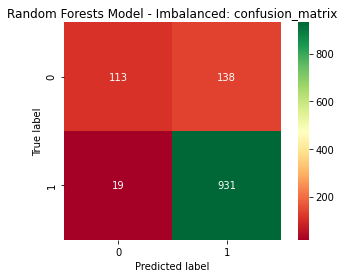

In [70]:
mat = confusion_matrix(y_test, y_pred_i)
sns.heatmap(mat, square=True, annot=True, fmt='d', cmap='RdYlGn')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Random Forests Model - Imbalanced: confusion_matrix');

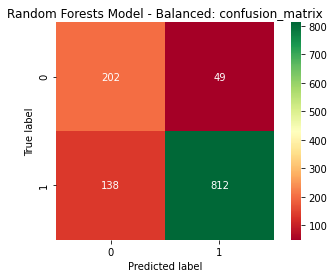

In [71]:
mat = confusion_matrix(y_test, y_pred_b)
sns.heatmap(mat, square=True, annot=True, fmt='d', cmap='RdYlGn')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Random Forests Model - Balanced: confusion_matrix');

In [72]:
print('Random Forests Model - Imabalanced: confusion_matrix')
print(pd.crosstab(y_test.ravel(), y_pred_i.ravel(), rownames = ['True'], colnames = ['Predicted'], margins = True))

Random Forests Model - Imabalanced: confusion_matrix
Predicted    0     1   All
True                      
0          113   138   251
1           19   931   950
All        132  1069  1201


In [73]:
print("Before over sampling")
print("As shown from the confusion Matrix: 138 out of 251 instances which belong to Class 0 have been classified as class 1, so basically we're missing about:")
print(round((138/251 * 100), 3), "%")

Before over sampling
As shown from the confusion Matrix: 138 out of 251 instances which belong to Class 0 have been classified as class 1, so basically we're missing about:
54.98 %


In [74]:
print('Random Forests Model - Balanced: confusion_matrix')
print(pd.crosstab(y_test.ravel(), y_pred_b.ravel(), rownames = ['True'], colnames = ['Predicted'], margins = True))

Random Forests Model - Balanced: confusion_matrix
Predicted    0    1   All
True                     
0          202   49   251
1          138  812   950
All        340  861  1201


In [75]:
print("After over sampling")
print("As shown from the confusion Matrix: 49 out of 251 instances which belong to Class 0 have been classified as class 1, so basically we're missing about:")
print(round((49/251 * 100), 3), "%")

After over sampling
As shown from the confusion Matrix: 49 out of 251 instances which belong to Class 0 have been classified as class 1, so basically we're missing about:
19.522 %


As shown above, even though the acuuracy went down from 86.9% to 84.4% our Model started classifing Minority class much better and has improved by 36% (Missing prediction in Minority class was 55% and after oversampling 19.5%)

### 9.5.3 Random Forests Model: ROC AUC

Random Forests Model - Imabalnced - AUC: 89.74229 %


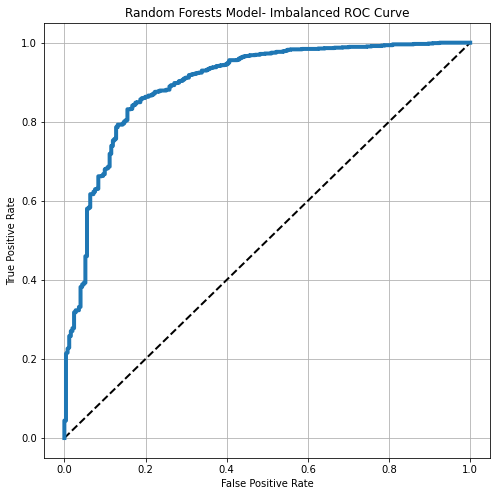

In [76]:
# Compute predicted probabilities: y_pred_prob:
y_pred_prob_i = rf_i.predict_proba(X_test)[:,1]

print("Random Forests Model - Imabalnced - AUC: {:0.5f}".format(roc_auc_score(y_test, y_pred_prob_i) * 100), "%")

# Generate ROC curve values: fpr, tpr, thresholds:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_i)
# Plot ROC curve:
plt.subplots(figsize = (8,8))
plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.plot(fpr, tpr, label='Random Forests Model', linewidth=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forests Model- Imbalanced ROC Curve')
plt.grid(True)
plt.show();

Random Forests Model - Balanced - AUC: 90.37932 %


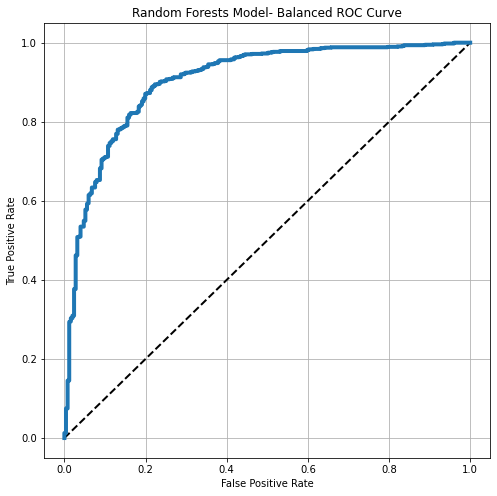

In [77]:
# Compute predicted probabilities: y_pred_prob:
y_pred_prob_b = rf_b.predict_proba(X_test)[:,1]

print("Random Forests Model - Balanced - AUC: {:0.5f}".format(roc_auc_score(y_test, y_pred_prob_b) * 100), "%")

# Generate ROC curve values: fpr, tpr, thresholds:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_b)
# Plot ROC curve:
plt.subplots(figsize = (8,8))
plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.plot(fpr, tpr, label='Random Forests Model', linewidth=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forests Model- Balanced ROC Curve')
plt.grid(True)
plt.show();

## 9.6 Gradient Boosting Model

### 9.6.1 Fitting a Gradient Boosting Model to the train set

In [78]:
from sklearn.ensemble import GradientBoostingClassifier

learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(learning_rate = learning_rate, max_depth = 3, random_state = 2018)
    gb.fit(X_train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X_test, y_test)))
    print()


GradientBoostingClassifier(learning_rate=0.05, random_state=2018)

Learning rate:  0.05
Accuracy score (training): 0.916
Accuracy score (validation): 0.892



GradientBoostingClassifier(random_state=2018)

Learning rate:  0.1
Accuracy score (training): 0.931
Accuracy score (validation): 0.893



GradientBoostingClassifier(learning_rate=0.25, random_state=2018)

Learning rate:  0.25
Accuracy score (training): 0.960
Accuracy score (validation): 0.892



GradientBoostingClassifier(learning_rate=0.5, random_state=2018)

Learning rate:  0.5
Accuracy score (training): 0.982
Accuracy score (validation): 0.878



GradientBoostingClassifier(learning_rate=0.75, random_state=2018)

Learning rate:  0.75
Accuracy score (training): 0.992
Accuracy score (validation): 0.879



GradientBoostingClassifier(learning_rate=1, random_state=2018)

Learning rate:  1
Accuracy score (training): 0.997
Accuracy score (validation): 0.866



In [79]:
Learning_rate = 0.25

## Create the classifier:
gb_i = GradientBoostingClassifier(learning_rate = Learning_rate, max_depth = 3, random_state = 2018)

# Fit the classifier to the training data
gb_i .fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred_i = gb_i.predict(X_test)

GradientBoostingClassifier(learning_rate=0.25, random_state=2018)

In [80]:
Learning_rate = 0.25

## Create the classifier:
gb_b = GradientBoostingClassifier(learning_rate = Learning_rate, max_depth = 3, random_state = 2018)

# Fit the classifier to the training data
gb_b .fit(X_train_new, y_train_new)

# Predict the labels of the test set: y_pred
y_pred_b = gb_b.predict(X_test)

GradientBoostingClassifier(learning_rate=0.25, random_state=2018)

### 9.6.2 Gradient Boosting Model: Evaluating Performance

In [81]:
# Run this block for model evaluation metrics 
print("Gradient Boosting Model - Imbalanced")
print("Accuracy: {:0.5f}".format(metrics.accuracy_score(y_test,y_pred_i) *100), "%")
print('\n')
print("Gradient Boosting Model - Imbalanced: classification report")
print(classification_report(y_test, y_pred_i, digits=6))

Gradient Boosting Model - Imbalanced
Accuracy: 89.17569 %


Gradient Boosting Model - Imbalanced: classification report
              precision    recall  f1-score   support

           0   0.823529  0.613546  0.703196       251
           1   0.904339  0.965263  0.933809       950

    accuracy                       0.891757      1201
   macro avg   0.863934  0.789404  0.818502      1201
weighted avg   0.887451  0.891757  0.885612      1201



In [82]:
# Run this block for model evaluation metrics 
print("Gradient Boosting Modelh - Balanced")
print("Accuracy: {:0.5f}".format(metrics.accuracy_score(y_test,y_pred_b) *100), "%")
print('\n')
print("Gradient Boosting Model - Balanced: classification report")
print(classification_report(y_test, y_pred_b, digits=6))

Gradient Boosting Modelh - Balanced
Accuracy: 87.01082 %


Gradient Boosting Model - Balanced: classification report
              precision    recall  f1-score   support

           0   0.661017  0.776892  0.714286       251
           1   0.938190  0.894737  0.915948       950

    accuracy                       0.870108      1201
   macro avg   0.799603  0.835815  0.815117      1201
weighted avg   0.880263  0.870108  0.873802      1201



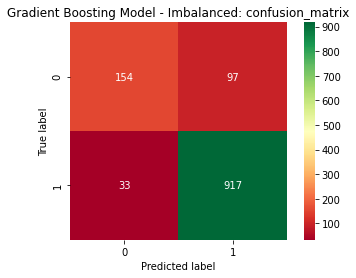

In [83]:
mat = confusion_matrix(y_test, y_pred_i)
sns.heatmap(mat, square=True, annot=True, fmt='d', cmap='RdYlGn')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Gradient Boosting Model - Imbalanced: confusion_matrix');

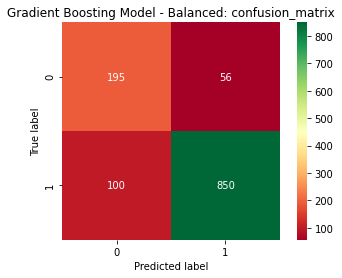

In [84]:
mat = confusion_matrix(y_test, y_pred_b)
sns.heatmap(mat, square=True, annot=True, fmt='d', cmap='RdYlGn')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Gradient Boosting Model - Balanced: confusion_matrix');

In [85]:
print('Gradient Boosting Model - Imabalanced: confusion_matrix')
print(pd.crosstab(y_test.ravel(), y_pred_i.ravel(), rownames = ['True'], colnames = ['Predicted'], margins = True))

Gradient Boosting Model - Imabalanced: confusion_matrix
Predicted    0     1   All
True                      
0          154    97   251
1           33   917   950
All        187  1014  1201


In [86]:
print("Before over sampling")
print("As shown from the confusion Matrix: 97 out of 251 instances which belong to Class 0 have been classified as class 1, so basically we're missing about:")
print(round((97/251 * 100), 3), "%")

Before over sampling
As shown from the confusion Matrix: 97 out of 251 instances which belong to Class 0 have been classified as class 1, so basically we're missing about:
38.645 %


In [87]:
print('Gradient Boosting Model - Balanced: confusion_matrix')
print(pd.crosstab(y_test.ravel(), y_pred_b.ravel(), rownames = ['True'], colnames = ['Predicted'], margins = True))

Gradient Boosting Model - Balanced: confusion_matrix
Predicted    0    1   All
True                     
0          195   56   251
1          100  850   950
All        295  906  1201


In [88]:
print("After over sampling")
print("As shown from the confusion Matrix: 56 out of 251 instances which belong to Class 0 have been classified as class 1, so basically we're missing about:")
print(round((56/251 * 100), 3), "%")


After over sampling
As shown from the confusion Matrix: 56 out of 251 instances which belong to Class 0 have been classified as class 1, so basically we're missing about:
22.311 %


As shown above, even though the acuuracy went down from 89.2% to 87% our Model started classifing Minority class much better and has improved by 16.3% (Missing prediction in Minority class was 38.6% and after oversampling 22.3%)

### 9.6.3 Gradient Boosting Model: ROC AUC

Gradient Boosting Model - Imabalnced - AUC: 90.82114 %


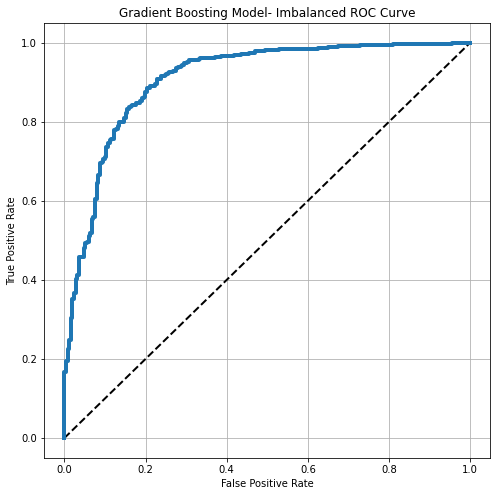

In [89]:
# Compute predicted probabilities: y_pred_prob:
y_pred_prob_i =gb_i.predict_proba(X_test)[:,1]

print("Gradient Boosting Model - Imabalnced - AUC: {:0.5f}".format(roc_auc_score(y_test, y_pred_prob_i) * 100), "%")

# Generate ROC curve values: fpr, tpr, thresholds:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_i)
# Plot ROC curve:
plt.subplots(figsize = (8,8))
plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.plot(fpr, tpr, label='Gradient Boosting Model', linewidth=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting Model- Imbalanced ROC Curve')
plt.grid(True)
plt.show();

Gradient Boosting Model - Balanced - AUC: 90.65716 %


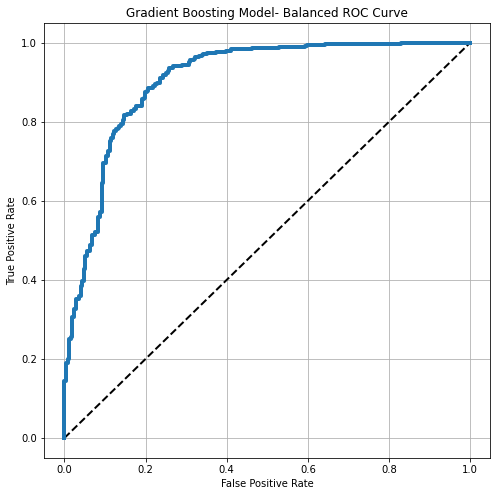

In [90]:
# Compute predicted probabilities: y_pred_prob:
y_pred_prob_b = gb_b.predict_proba(X_test)[:,1]

print("Gradient Boosting Model - Balanced - AUC: {:0.5f}".format(roc_auc_score(y_test, y_pred_prob_b) * 100), "%")

# Generate ROC curve values: fpr, tpr, thresholds:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_b)
# Plot ROC curve:
plt.subplots(figsize = (8,8))
plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.plot(fpr, tpr, label='Gradient Boosting Model', linewidth=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting Model- Balanced ROC Curve')
plt.grid(True)
plt.show();

## 9.7 Extreme Gradient Boosting Model

### 9.7.1 Fitting a Extreme Gradient Boosting Model to the train set

In [91]:
import xgboost as xgb

# Instantiate the XGBClassifier: xg_cl
xg_cl_i = xgb.XGBClassifier(objective='binary:logistic', max_depth=3 ,seed=2018) # we set here the max_depth=3 because the default is 6 & n_estimators default is 100 similar to Random Forests & GB Models.

# Fit the classifier to the training set
xg_cl_i.fit(X_train, y_train)

# Predict the labels of the test set: preds
y_pred_i = xg_cl_i.predict(X_test)



[03:17:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\aktha\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              random_state=2018, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=2018, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [92]:
import xgboost as xgb

# Instantiate the XGBClassifier: xg_cl
xg_cl_b = xgb.XGBClassifier(objective='binary:logistic', max_depth=3 ,seed=2018) # we set here the max_depth=3 because the default is 6 & n_estimators default is 100 similar to Random Forests & GB Models.

# Fit the classifier to the training set
xg_cl_b.fit(X_train_new, y_train_new)

# Predict the labels of the test set: preds
y_pred_b = xg_cl_b.predict(X_test)

[03:17:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              random_state=2018, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=2018, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

### 9.7.2 Extreme Gradient Boosting Model: Evaluating Performance

In [93]:
# Run this block for model evaluation metrics 
print("Extreme Gradient Boosting Model - Imbalanced")
print("Accuracy: {:0.5f}".format(metrics.accuracy_score(y_test,y_pred_i) *100), "%")
print('\n')
print("Extreme Gradient Boosting Model - Imbalanced: classification report")
print(classification_report(y_test, y_pred_i, digits=6))

Extreme Gradient Boosting Model - Imbalanced
Accuracy: 89.75853 %


Extreme Gradient Boosting Model - Imbalanced: classification report
              precision    recall  f1-score   support

           0   0.836842  0.633466  0.721088       251
           1   0.909001  0.967368  0.937277       950

    accuracy                       0.897585      1201
   macro avg   0.872922  0.800417  0.829183      1201
weighted avg   0.893920  0.897585  0.892095      1201



In [94]:
# Run this block for model evaluation metrics 
print("Extreme Gradient Boosting Model - Balanced")
print("Accuracy: {:0.5f}".format(metrics.accuracy_score(y_test,y_pred_b) *100), "%")
print('\n')
print("Extreme Gradient Boosting Model - Balanced: classification report")
print(classification_report(y_test, y_pred_b, digits=6))

Extreme Gradient Boosting Model - Balanced
Accuracy: 87.42714 %


Extreme Gradient Boosting Model - Balanced: classification report
              precision    recall  f1-score   support

           0   0.673611  0.772908  0.719852       251
           1   0.937568  0.901053  0.918948       950

    accuracy                       0.874271      1201
   macro avg   0.805590  0.836980  0.819400      1201
weighted avg   0.882403  0.874271  0.877338      1201



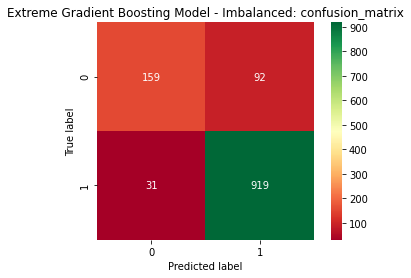

In [95]:
mat = confusion_matrix(y_test, y_pred_i)
sns.heatmap(mat, square=True, annot=True, fmt='d', cmap='RdYlGn')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Extreme Gradient Boosting Model - Imbalanced: confusion_matrix');

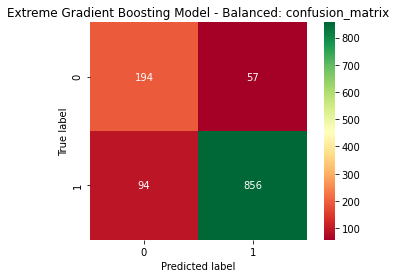

In [96]:
mat = confusion_matrix(y_test, y_pred_b)
sns.heatmap(mat, square=True, annot=True, fmt='d', cmap='RdYlGn')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Extreme Gradient Boosting Model - Balanced: confusion_matrix');

In [97]:
print('Extreme Gradient Boosting Model - Imabalanced: confusion_matrix')
print(pd.crosstab(y_test.ravel(), y_pred_i.ravel(), rownames = ['True'], colnames = ['Predicted'], margins = True))

Extreme Gradient Boosting Model - Imabalanced: confusion_matrix
Predicted    0     1   All
True                      
0          159    92   251
1           31   919   950
All        190  1011  1201


In [98]:
print("Before over sampling")
print("As shown from the confusion Matrix: 92 out of 251 instances which belong to Class 0 have been classified as class 1, so basically we're missing about:")
print(round((92/251 * 100), 3), "%")

Before over sampling
As shown from the confusion Matrix: 92 out of 251 instances which belong to Class 0 have been classified as class 1, so basically we're missing about:
36.653 %


In [99]:
print('Extreme Gradient Boosting Model - Balanced: confusion_matrix')
print(pd.crosstab(y_test.ravel(), y_pred_b.ravel(), rownames = ['True'], colnames = ['Predicted'], margins = True))

Extreme Gradient Boosting Model - Balanced: confusion_matrix
Predicted    0    1   All
True                     
0          194   57   251
1           94  856   950
All        288  913  1201


In [100]:
print("After over sampling")
print("As shown from the confusion Matrix: 57 out of 251 instances which belong to Class 0 have been classified as class 1, so basically we're missing about:")
print(round((57/251 * 100), 3), "%")

After over sampling
As shown from the confusion Matrix: 57 out of 251 instances which belong to Class 0 have been classified as class 1, so basically we're missing about:
22.709 %


As shown above, even though the acuracy went down from 89.8% to 87.4% our Model started classifing Minority class much better and has improved by 14% (Missing prediction in Minority class was 36.7% and after oversampling 22.7%)

### 9.7.3 Extreme Gradient Boosting Model: ROC AUC

Model Entropy - no max dept - Imabalnced - AUC: 91.46026 %


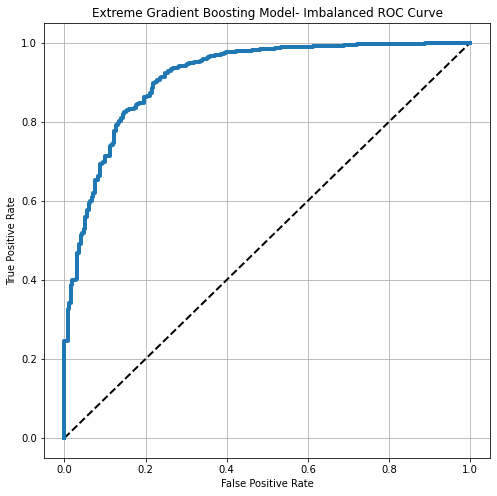

In [101]:
# Compute predicted probabilities: y_pred_prob:
y_pred_prob_i = xg_cl_i.predict_proba(X_test)[:,1]

print("Model Entropy - no max dept - Imabalnced - AUC: {:0.5f}".format(roc_auc_score(y_test, y_pred_prob_i) * 100), "%")

# Generate ROC curve values: fpr, tpr, thresholds:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_i)
# Plot ROC curve:
plt.subplots(figsize = (8,8))
plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.plot(fpr, tpr, label='Extreme Gradient Boosting Model', linewidth=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Extreme Gradient Boosting Model- Imbalanced ROC Curve')
plt.grid(True)
plt.show();

Extreme Gradient Boosting Model - Balanced - AUC: 91.10925 %


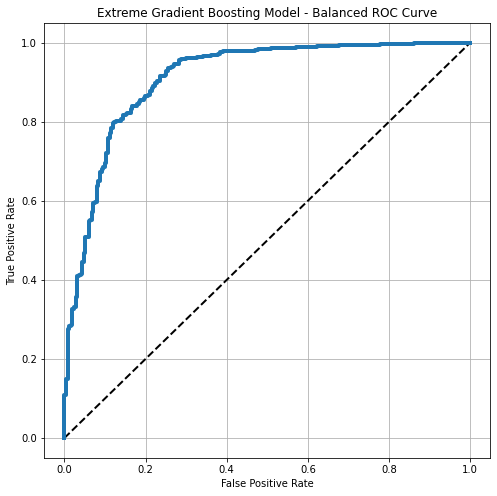

In [102]:
# Compute predicted probabilities: y_pred_prob:
y_pred_prob_b = xg_cl_b.predict_proba(X_test)[:,1]

print("Extreme Gradient Boosting Model - Balanced - AUC: {:0.5f}".format(roc_auc_score(y_test, y_pred_prob_b) * 100), "%")

# Generate ROC curve values: fpr, tpr, thresholds:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_b)
# Plot ROC curve:
plt.subplots(figsize = (8,8))
plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.plot(fpr, tpr, label='Extreme Gradient Boosting Model', linewidth=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Extreme Gradient Boosting Model - Balanced ROC Curve')
plt.grid(True)
plt.show();

## 9.8 Support Vector Machine

### 9.8.1 Fitting a Support Vector Machine to a train set

In [103]:
from sklearn.svm import SVC

# Declare a variable called svc_cl_i, and assign it:
svc_cl_i = SVC(kernel='linear', probability=True, random_state=2018) # Need to set probability=True (default= False) so we can calculate ROC AUC (.predict_proba())

# Call fit() on entr_model:
svc_cl_i.fit(X_train, y_train)

# Call predict() on entr_model with X_test passed to it, and assign the result to a variable y_pred 
y_pred_i = svc_cl_i.predict(X_test)

SVC(kernel='linear', probability=True, random_state=2018)

In [104]:
# Declare a variable called svc_cl_i, and assign it:
svc_cl_b = SVC(kernel='linear', probability=True, random_state=2018)  # Need to set probability=True (default= False) so we can calculate ROC AUC (.predict_proba())

# Call fit() on entr_model:
svc_cl_b.fit(X_train_new, y_train_new)

# Call predict() on entr_model with X_test passed to it, and assign the result to a variable y_pred 
y_pred_b = svc_cl_b.predict(X_test)

SVC(kernel='linear', probability=True, random_state=2018)

### 9.8.2 Support Vector Machine: Evaluating Performance

In [105]:
# Run this block for model evaluation metrics 
print("Support Vector Machine - Imbalanced")
print("Accuracy: {:0.5f}".format(metrics.accuracy_score(y_test,y_pred_i) *100), "%")
print('\n')
print("Support Vector Machine - Imbalanced: classification report")
print(classification_report(y_test, y_pred_i, digits=6))

Support Vector Machine - Imbalanced
Accuracy: 86.76103 %


Support Vector Machine - Imbalanced: classification report
              precision    recall  f1-score   support

           0   0.833333  0.458167  0.591260       251
           1   0.872060  0.975789  0.921013       950

    accuracy                       0.867610      1201
   macro avg   0.852697  0.716978  0.756137      1201
weighted avg   0.863967  0.867610  0.852097      1201



In [106]:
# Run this block for model evaluation metrics 
print("Support Vector Machine - Balanced")
print("Accuracy: {:0.5f}".format(metrics.accuracy_score(y_test,y_pred_b) *100), "%")
print('\n')
print("Support Vector Machine - Balanced: classification report")
print(classification_report(y_test, y_pred_b, digits=6))

Support Vector Machine - Balanced
Accuracy: 84.26311 %


Support Vector Machine - Balanced: classification report
              precision    recall  f1-score   support

           0   0.591716  0.796813  0.679117       251
           1   0.940904  0.854737  0.895753       950

    accuracy                       0.842631      1201
   macro avg   0.766310  0.825775  0.787435      1201
weighted avg   0.867926  0.842631  0.850478      1201



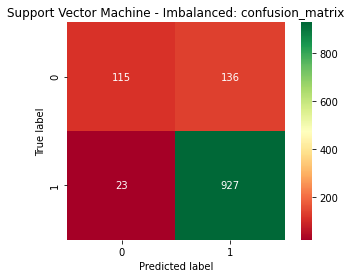

In [107]:
mat = confusion_matrix(y_test, y_pred_i)
sns.heatmap(mat, square=True, annot=True, fmt='d', cmap='RdYlGn')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Support Vector Machine - Imbalanced: confusion_matrix');

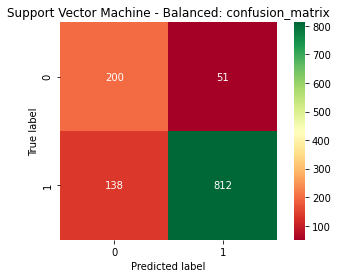

In [108]:
mat = confusion_matrix(y_test, y_pred_b)
sns.heatmap(mat, square=True, annot=True, fmt='d', cmap='RdYlGn')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Support Vector Machine - Balanced: confusion_matrix');

In [109]:
print('Support Vector Machine - Imabalanced: confusion_matrix')
print(pd.crosstab(y_test.ravel(), y_pred_i.ravel(), rownames = ['True'], colnames = ['Predicted'], margins = True))

Support Vector Machine - Imabalanced: confusion_matrix
Predicted    0     1   All
True                      
0          115   136   251
1           23   927   950
All        138  1063  1201


In [110]:
print("Before over sampling")
print("As shown from the confusion Matrix: 136 out of 251 instances which belong to Class 0 have been classified as class 1, so basically we're missing about:")
print(round((136/251 * 100), 3), "%")

Before over sampling
As shown from the confusion Matrix: 136 out of 251 instances which belong to Class 0 have been classified as class 1, so basically we're missing about:
54.183 %


In [111]:
print('Support Vector Machine - Balanced: confusion_matrix')
print(pd.crosstab(y_test.ravel(), y_pred_b.ravel(), rownames = ['True'], colnames = ['Predicted'], margins = True))

Support Vector Machine - Balanced: confusion_matrix
Predicted    0    1   All
True                     
0          200   51   251
1          138  812   950
All        338  863  1201


In [112]:
print("After over sampling")
print("As shown from the confusion Matrix: 51 out of 251 instances which belong to Class 0 have been classified as class 1, so basically we're missing about:")
print(round((51/251 * 100), 3), "%")


After over sampling
As shown from the confusion Matrix: 51 out of 251 instances which belong to Class 0 have been classified as class 1, so basically we're missing about:
20.319 %


As shown above, even though the acuuracy went down from 86.8% to 84.3% our Model started classifing Minority class much better and has improved by 33.9% (Missing prediction in Minority class was 54.2% and after oversampling 20.3%)

### 9.8.3 Support Vector Machine: ROC AUC

Support Vector Machine - Imabalnced - AUC: 89.56720 %


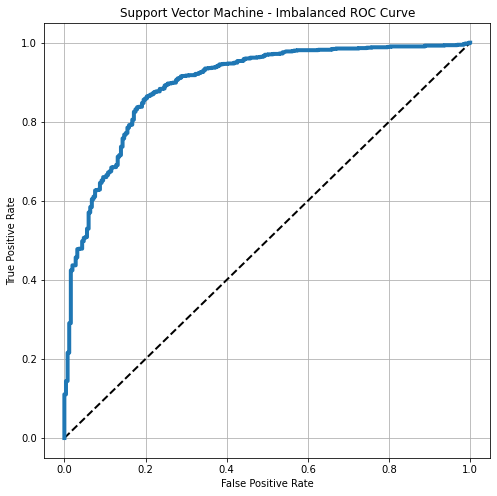

In [113]:
# Compute predicted probabilities: y_pred_prob:
y_pred_prob_i = svc_cl_i.predict_proba(X_test)[:,1]

print("Support Vector Machine - Imabalnced - AUC: {:0.5f}".format(roc_auc_score(y_test, y_pred_prob_i) * 100), "%")

# Generate ROC curve values: fpr, tpr, thresholds:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_i)
# Plot ROC curve:
plt.subplots(figsize = (8,8))
plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.plot(fpr, tpr, label='Support Vector Machine', linewidth=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Support Vector Machine - Imbalanced ROC Curve')
plt.grid(True)
plt.show();

Support Vector Machine - Balanced - AUC: 90.04823 %


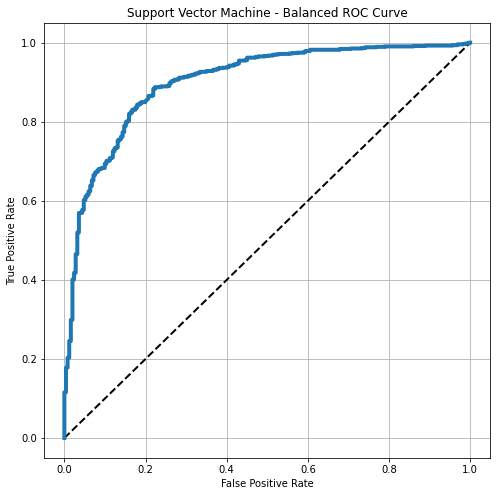

In [114]:
# Compute predicted probabilities: y_pred_prob:
y_pred_prob_b = svc_cl_b.predict_proba(X_test)[:,1]

print("Support Vector Machine - Balanced - AUC: {:0.5f}".format(roc_auc_score(y_test, y_pred_prob_b) * 100), "%")

# Generate ROC curve values: fpr, tpr, thresholds:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_b)
# Plot ROC curve:
plt.subplots(figsize = (8,8))
plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.plot(fpr, tpr, label='Support Vector Machine', linewidth=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Support Vector Machine - Balanced ROC Curve')
plt.grid(True)
plt.show();

## 10. Best Model and Conclusion

As shown below, **The Extreme Gradient Boosting (XGBoost) Model** shows an overall superior Performance across the board, which is great and indicates that our model outperforms all other Models and was effectively able to classify songs as being either 'Hip-Hop' or 'Rock' - all without listening to a single one ourselves regearldess when we have balanced or imabalanced dependent variable:


|Model|Accuracy - Imbalanced|Accuracy - Balanced|AUC - Imbalanced|AUC - Balanced|% Class 0 (Missing Prediction) - Imbalanced |%Class 0 (Missing Prediction) - Balanced |% Class 0 (Missing Prediction) Improvement After SMOTE|
|:---------------------------------:|:---------------------------------:|:---------------------------------:|:---------------------------------:|:---------------------------------:|:---------------------------------:|:---------------------------------:|:---------------------------------:|
|Decision Tree - Entropy - max_depth 3|86.42798|85.92839|88.23|87.3|52.2|28.7|23.5|
|Decision Tree - Gini - max_depth 3|86.76103|85.92839|87.73055|88.10401|50.6|28.7|22|
|Logistic Regression|86.76103|84.26311|90.06291|90.01887|51|20.7|30.3|
|Random Forests|86.92756|84.42964|89.74229|90.37932|55|19.5|36|
|Gradient-Boosting|89.17569|87.01082|90.82114|90.65716|38.6|22.3|16.3|
|<code>XGBoost</code>|<code>89.76|<code>87.43</code>|<code>91.46</code>|<code>91.11</code>|<code>36.7</code>|<code>22.7</code>|<code>14</code>|
|SVM: Support Vector Machines|86.76103|84.26311|89.5672|90.04823|54.2|20.3|33.9|
    
    
![Confusion_Matrix](https://user-images.githubusercontent.com/67468718/107220712-85da0b80-69c7-11eb-9a83-1f4476ca2b4e.JPG)
![ROC_AUC_1](https://user-images.githubusercontent.com/67468718/107220728-8a062900-69c7-11eb-88b6-8a19a237cc2b.JPG)
![ROC_AUC_2](https://user-images.githubusercontent.com/67468718/107220732-8a9ebf80-69c7-11eb-9092-7bf31541c8d9.JPG)    

In [1]:
#Let's run below to increase the width of the Jupyter cell to 100% for better visibility:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
#Let's run below to allow for multiple print from one jupyter cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"